**sales prediction**

->Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supressing warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
ad = pd.DataFrame(pd.read_csv('/content/sales_predictions.csv'))
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad.shape

(200, 4)

In [6]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


cleaning the data

In [8]:
#check null values
ad.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


checking outlier

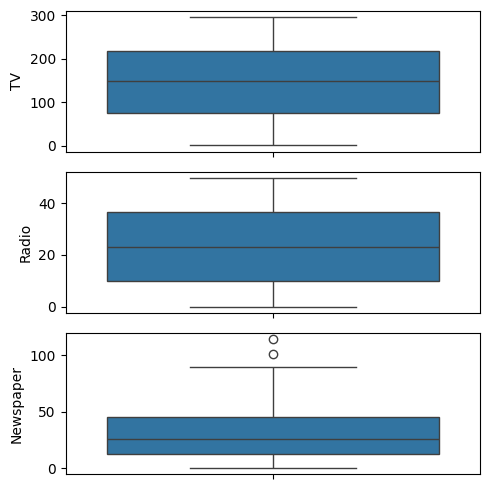

In [11]:
fig, axs = plt.subplots(3, figsize =(5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Radio'], ax = axs[1])
plt3 = sns.boxplot(ad['Newspaper'], ax = axs[2])
plt.tight_layout()

Exploratory Data Analysis

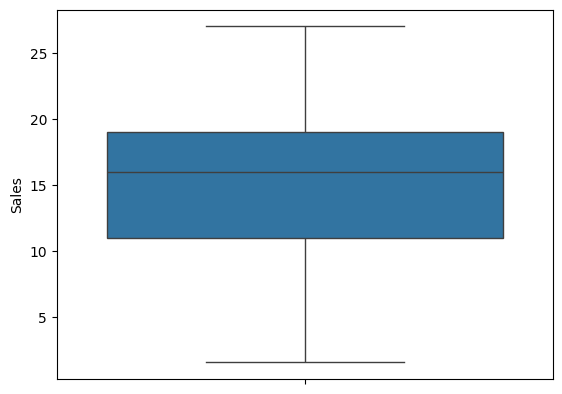

In [12]:
sns.boxplot(ad['Sales'])
plt.show()

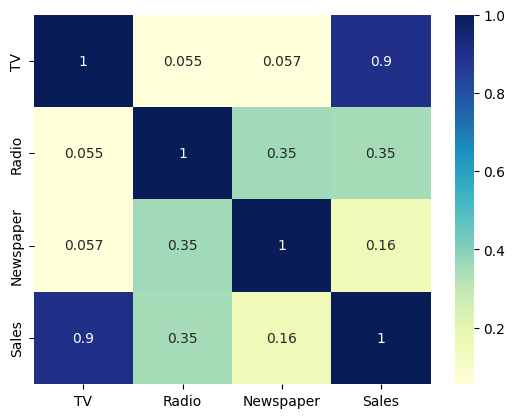

In [14]:
#correlation between different variables.
sns.heatmap(ad.corr(), cmap='YlGnBu', annot =True)
plt.show()

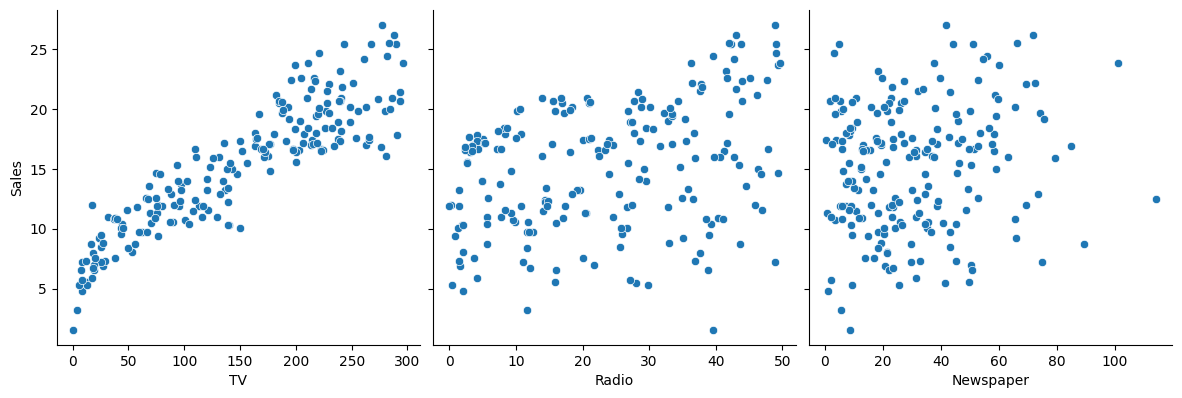

In [16]:
#variables which are using scatter plot.
sns.pairplot(ad, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

now we'll building model

In [17]:
x = ad['TV']
y = ad['Sales']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, test_size=0.4, random_state=100)

In [24]:
x_train.head()

,TV
12,23.8
16,67.8
101,296.4
120,141.3
45,175.1


In [25]:
#now we will buiding linear model
import statsmodels.api as sm

In [26]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [27]:
lr.params

,0
const,6.780417
TV,0.055639


In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     543.6
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           5.43e-46
Time:                        15:23:57   Log-Likelihood:                -278.69
No. Observations:                 120   AIC:                             561.4
Df Residuals:                     118   BIC:                             566.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7804      0.419     16.180      0.0

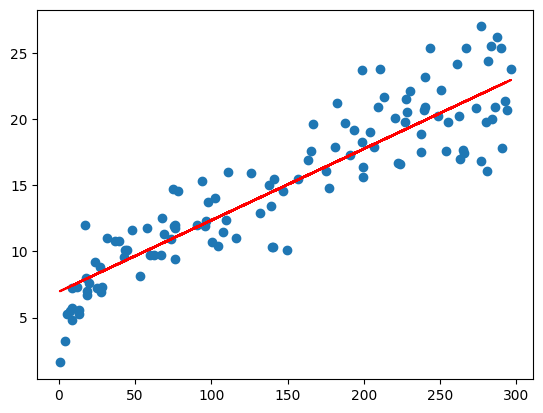

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

**Model Evalution**

In [31]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

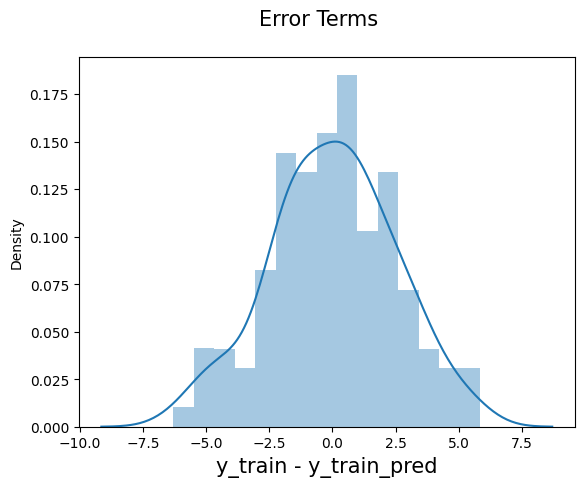

In [35]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

looking for patterns in the residuals

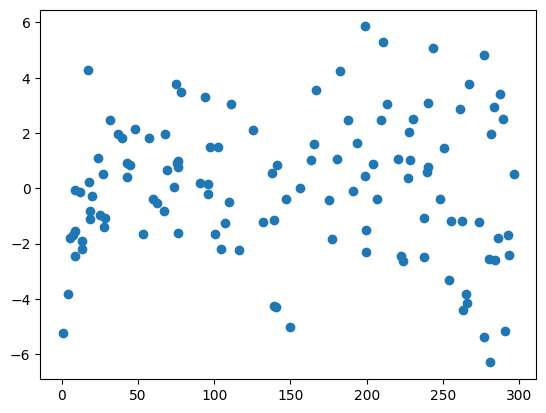

In [37]:
plt.scatter(x_train, res)
plt.show()

In [38]:
#add a constant to x_test
x_test_sm = sm.add_constant(x_test)

#predict value of y corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [39]:
y_pred.head()

,0
126,7.214399
104,20.033555
99,14.302769
92,18.892962
111,20.228291


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.994739178382777

In [44]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7807592057194056

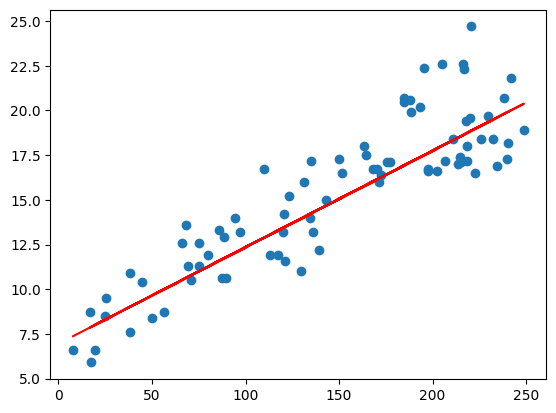

In [45]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()